In [31]:
import astunparse

from moa.frontend import MOAParser
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.reduction import reduce_ast
from moa.backend import generate_python_source

parser = MOAParser()

# Frontend

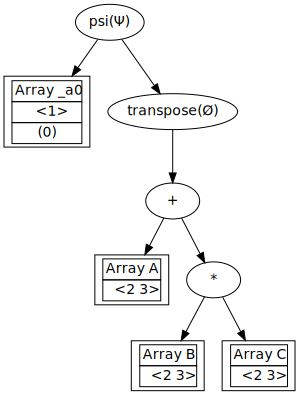

In [19]:
symbol_table, tree = parser.parse('<0> psi (tran(A ^ <2 3> + B ^ <2 3> * C ^ <2 3>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

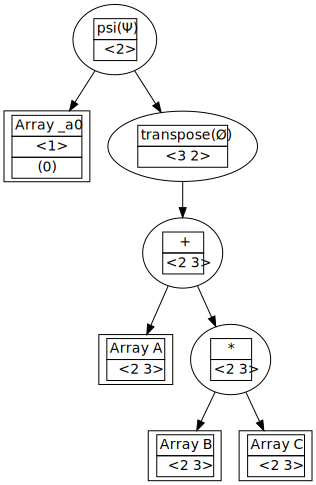

In [23]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction

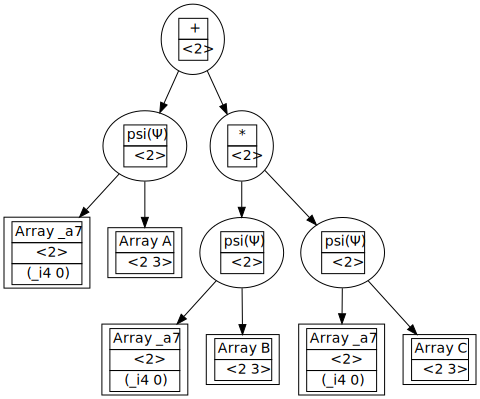

In [24]:
reduced_symbol_table, reduced_tree = reduce_ast(shape_symbol_table, shape_tree)
visualize_ast(reduced_symbol_table, reduced_tree)

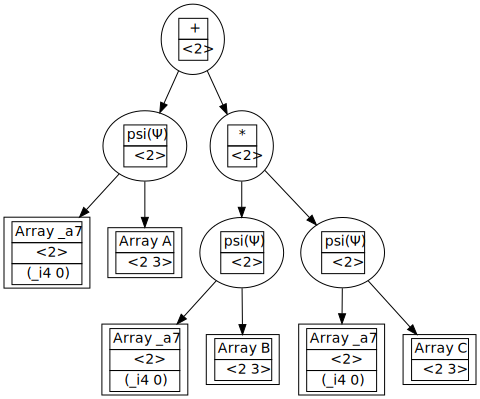

In [27]:
# multiple passes for reduction (to combine if statements)
reduced_symbol_table, reduced_tree = reduce_ast(reduced_symbol_table, reduced_tree, add_indexing=False)
visualize_ast(reduced_symbol_table, reduced_tree)

# Backend (Python)

In [28]:
print(generate_python_source(reduced_symbol_table, reduced_tree, materialize_scalars=True))

(A[('_i4', 0)] + (B[('_i4', 0)] * C[('_i4', 0)]))


In [29]:
from moa.backend.python import add_function_wrapper

In [30]:
import astunparse
print(astunparse.unparse(add_function_wrapper(reduced_symbol_table)))



def f(B, C, A):
    pass

